# Keywords
- Use extracted keywords from S-1 raw filings
- Word2Vect visualization method by Jeff Delaney: Visualizing Word Vectors with t-SNE
 - https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [1]:
#core
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
from sklearn import neighbors

import glob
import nasdaq
import ml
from pathlib import Path
from sklearn.manifold import TSNE

#NLP
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from gensim.summarization import keywords
from gensim.models import Word2Vec

C:\Users\Void\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Integrating IPO Keywords

In [2]:
#load previous dataset
df = pd.read_csv('../Datasets/3 summarization.csv', index_col='Symbol')
df = df[list(df.columns.drop(['1D', '1W', '1M', '3M'])) + ['1D', '1W', '1M', '3M']]

In [3]:
#tokenize words
counter = 0    
documents = []

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                documents.append(word_tokenize(text))
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)


( 1 / 996 ) AACC

( 2 / 996 ) AAT

( 3 / 996 ) ABLX
no S-1 keywords for  ABLX

( 4 / 996 ) ABR

( 5 / 996 ) ABTX

( 6 / 996 ) ACAD

( 7 / 996 ) ACFC

( 8 / 996 ) ACIA

( 9 / 996 ) ACIU
no S-1 keywords for  ACIU

( 10 / 996 ) ACLS
no S-1 keywords for  ACLS

( 11 / 996 ) ACLZ
no S-1 keywords for  ACLZ

( 12 / 996 ) ACM
no S-1 keywords for  ACM

( 13 / 996 ) ACMR

( 14 / 996 ) ACN
no S-1 keywords for  ACN

( 15 / 996 ) ACOR

( 16 / 996 ) ACRX

( 17 / 996 ) ACUS

( 18 / 996 ) ADAP
no S-1 keywords for  ADAP

( 19 / 996 ) ADMS

( 20 / 996 ) ADOM

( 21 / 996 ) ADRO

( 22 / 996 ) ADSW

( 23 / 996 ) ADT

( 24 / 996 ) ADUS

( 25 / 996 ) AEL

( 26 / 996 ) AER
no S-1 keywords for  AER

( 27 / 996 ) AERI

( 28 / 996 ) AFFY

( 29 / 996 ) AFH

( 30 / 996 ) AIMC

( 31 / 996 ) AIMT

( 32 / 996 ) AIZ

( 33 / 996 ) AJX

( 34 / 996 ) AKAO

( 35 / 996 ) AKBA

( 36 / 996 ) AKER

( 37 / 996 ) AL

( 38 / 996 ) ALDR

( 39 / 996 ) ALDX

( 40 / 996 ) ALGRU
no S-1 keywords for  ALGRU

( 41 / 996 ) ALGT

( 42 / 9

no S-1 keywords for  HSTM

( 421 / 996 ) HTBX
no S-1 keywords for  HTBX

( 422 / 996 ) HTGM

( 423 / 996 ) HTHT
no S-1 keywords for  HTHT

( 424 / 996 ) HTZ

( 425 / 996 ) HUBS

( 426 / 996 ) HUD
no S-1 keywords for  HUD

( 427 / 996 ) HURN

( 428 / 996 ) HWCC

( 429 / 996 ) HYRE
no S-1 keywords for  HYRE

( 430 / 996 ) ICPT

( 431 / 996 ) IIIV
no S-1 keywords for  IIIV

( 432 / 996 ) IIPR

( 433 / 996 ) ILMN
no S-1 keywords for  ILMN

( 434 / 996 ) ILPT

( 435 / 996 ) IMDZ

( 436 / 996 ) IMI

( 437 / 996 ) IMRN
no S-1 keywords for  IMRN

( 438 / 996 ) INFN
no S-1 keywords for  INFN

( 439 / 996 ) INN

( 440 / 996 ) INOV

( 441 / 996 ) INST

( 442 / 996 ) INTX

( 443 / 996 ) INXN
no S-1 keywords for  INXN

( 444 / 996 ) IOTS

( 445 / 996 ) IPCC
no S-1 keywords for  IPCC

( 446 / 996 ) IPIC
no S-1 keywords for  IPIC

( 447 / 996 ) JASO
no S-1 keywords for  JASO

( 448 / 996 ) JBLU

( 449 / 996 ) JCAP

( 450 / 996 ) JD
no S-1 keywords for  JD

( 451 / 996 ) JELD

( 452 / 996 ) JILL

( 45


( 823 / 996 ) SQ
no S-1 keywords for  SQ

( 824 / 996 ) SREV

( 825 / 996 ) SRLP

( 826 / 996 ) SRTI
no S-1 keywords for  SRTI

( 827 / 996 ) SSLJ
no S-1 keywords for  SSLJ

( 828 / 996 ) SSNC

( 829 / 996 ) SSRX
no S-1 keywords for  SSRX

( 830 / 996 ) SSTI

( 831 / 996 ) SSTK

( 832 / 996 ) ST
no S-1 keywords for  ST

( 833 / 996 ) STAY

( 834 / 996 ) STDY

( 835 / 996 ) STIM
no S-1 keywords for  STIM

( 836 / 996 ) STML

( 837 / 996 ) STND

( 838 / 996 ) STNG
no S-1 keywords for  STNG

( 839 / 996 ) STON

( 840 / 996 ) STRI
no S-1 keywords for  STRI

( 841 / 996 ) STWD

( 842 / 996 ) SUPN

( 843 / 996 ) SWCH
no S-1 keywords for  SWCH

( 844 / 996 ) SXC

( 845 / 996 ) SXCP

( 846 / 996 ) SYF

( 847 / 996 ) SYNA

( 848 / 996 ) SYRS

( 849 / 996 ) TAGS

( 850 / 996 ) TANH
no S-1 keywords for  TANH

( 851 / 996 ) TAST

( 852 / 996 ) TBIO
no S-1 keywords for  TBIO

( 853 / 996 ) TBK

( 854 / 996 ) TBNK

( 855 / 996 ) TBRGU
no S-1 keywords for  TBRGU

( 856 / 996 ) TCDA
no S-1 keywords f

# Word2Vect

In [4]:
# build vocabulary and train model
model1 = Word2Vec(documents, size=len(documents))
model2 = Word2Vec(documents, size=len(documents), hs=1, negative=0)

In [5]:
# Code by Jeff Delaney: Visualizing Word Vectors with t-SNE
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
matplotlib.rcParams.update({'font.size': 10})

C:\Users\Void\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


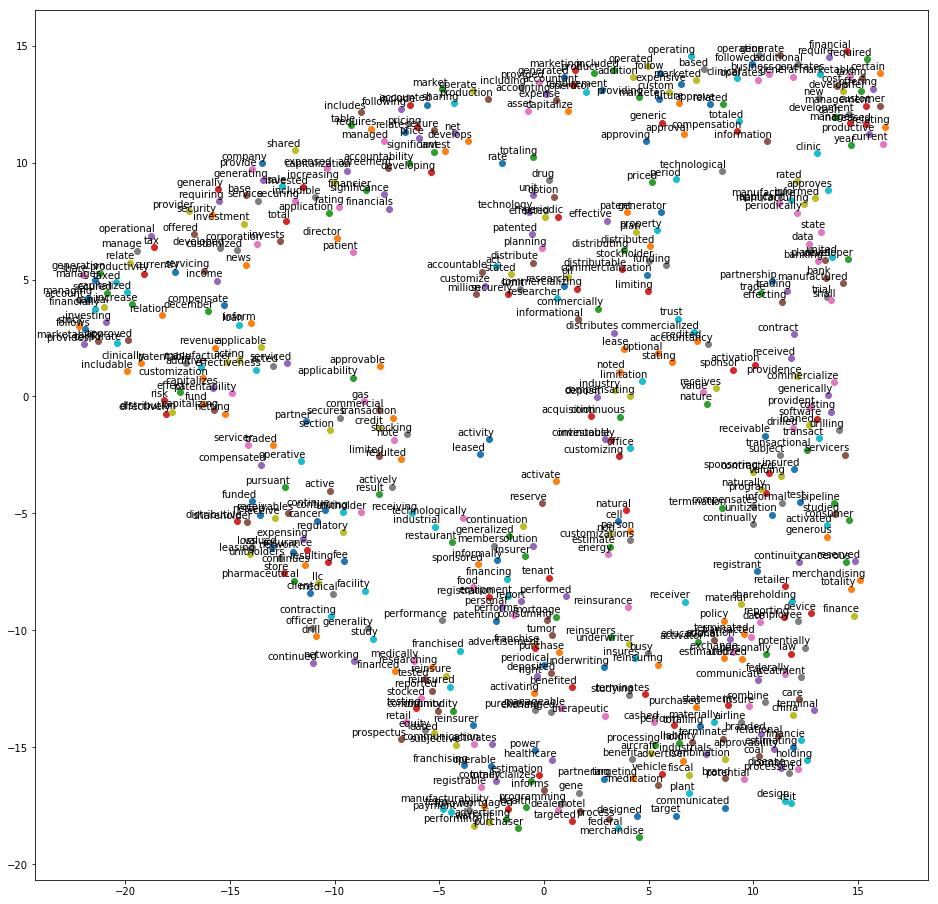

In [6]:
tsne_plot(model1)

In [7]:
' '.join(list(model1.wv.vocab.keys()))

'receivable certain cash financial received information operates operation receives operating follow purchased included accountant accounting expense asset including operate sharing accounted purchase accountability include following includes expensed purchasing shared receiving company inform december tax operational receivables share account receive taxed follows stock purchaser management offering taxing marketable accountancy addition property requirement lease totaling tenant capitalization base corporation officer leasing financially managing includable related marketing net accountable managed service capital corporate leased relating offer manages costing cost general additional marketed office generated capitalize market generally income servicing servicer manage relate capitalized manager relation required retailer require generate business based operated operator relates requires table total requiring offered retail generality loaned generates rate invest mortgage invested g

# Integrate Word Embeddings

In [8]:
#add sentiment features
df_keywords_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                words = word_tokenize(text)
                    
                #keywords features
                df_keywords_features.at[x, 'Keywords Count'] = len(words)
                dist = []
                vect = []
                
                for w in words:
                    scores = []
                    
                    if w in model1.wv.vocab:
                        for _, j in model1.wv.most_similar(w):
                            dist.append(j)
                    
                    if w in model1.wv.vocab:
                        for k in model1.wv[w]:
                            vect.append(j)
                    
                    if w in model2.wv.vocab:
                        scores.append(model2.score(w))
                    
                df_keywords_features.at[x, 'Keywords Similarity Top'] = dist[0]
                df_keywords_features.at[x, 'Keywords Similarity Sum'] = np.sum(dist)
                df_keywords_features.at[x, 'Keywords Similarity Vect Min'] = np.min(vect)
                df_keywords_features.at[x, 'Keywords Similarity Vect Max'] = np.max(vect)
                df_keywords_features.at[x, 'Keywords Similarity Vect Sum'] = np.sum(vect)
                df_keywords_features.at[x, 'Keywords Similarity Vect Mean'] = np.mean(vect)
                #df_keywords_features.at[x, 'Keywords Similarity Word Score Sum'] = np.sum(scores)
                #df_keywords_features.at[x, 'Keywords Similarity Word Score Mean'] = np.mean(scores)
                    
                #df_keywords_features.at[x, 'Keywords Similarity Words Score'] = model2.score(words)[0]
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)


( 1 / 996 ) AACC

( 2 / 996 ) AAT

( 3 / 996 ) ABLX
no S-1 keywords for  ABLX

( 4 / 996 ) ABR

( 5 / 996 ) ABTX

( 6 / 996 ) ACAD

( 7 / 996 ) ACFC

( 8 / 996 ) ACIA

( 9 / 996 ) ACIU
no S-1 keywords for  ACIU

( 10 / 996 ) ACLS
no S-1 keywords for  ACLS

( 11 / 996 ) ACLZ
no S-1 keywords for  ACLZ

( 12 / 996 ) ACM
no S-1 keywords for  ACM

( 13 / 996 ) ACMR

( 14 / 996 ) ACN
no S-1 keywords for  ACN

( 15 / 996 ) ACOR

( 16 / 996 ) ACRX

( 17 / 996 ) ACUS

( 18 / 996 ) ADAP
no S-1 keywords for  ADAP

( 19 / 996 ) ADMS

( 20 / 996 ) ADOM

( 21 / 996 ) ADRO

( 22 / 996 ) ADSW

( 23 / 996 ) ADT

( 24 / 996 ) ADUS

( 25 / 996 ) AEL

( 26 / 996 ) AER
no S-1 keywords for  AER

( 27 / 996 ) AERI

( 28 / 996 ) AFFY

( 29 / 996 ) AFH

( 30 / 996 ) AIMC

( 31 / 996 ) AIMT

( 32 / 996 ) AIZ

( 33 / 996 ) AJX

( 34 / 996 ) AKAO

( 35 / 996 ) AKBA

( 36 / 996 ) AKER

( 37 / 996 ) AL

( 38 / 996 ) ALDR

( 39 / 996 ) ALDX

( 40 / 996 ) ALGRU
no S-1 keywords for  ALGRU

( 41 / 996 ) ALGT

( 42 / 9


( 307 / 996 ) EVA

( 308 / 996 ) EVAC
no S-1 keywords for  EVAC

( 309 / 996 ) EVBG

( 310 / 996 ) EVC

( 311 / 996 ) EVEP

( 312 / 996 ) EVER
no S-1 keywords for  EVER

( 313 / 996 ) EVHC

( 314 / 996 ) EVTC

( 315 / 996 ) EYE

( 316 / 996 ) EYEN

( 317 / 996 ) FAMI
no S-1 keywords for  FAMI

( 318 / 996 ) FAT
no S-1 keywords for  FAT

( 319 / 996 ) FBM

( 320 / 996 ) FCB

( 321 / 996 ) FELP

( 322 / 996 ) FET

( 323 / 996 ) FEYE

( 324 / 996 ) FFHL
no S-1 keywords for  FFHL

( 325 / 996 ) FGEN

( 326 / 996 ) FIXX

( 327 / 996 ) FMCN
no S-1 keywords for  FMCN

( 328 / 996 ) FMI

( 329 / 996 ) FMSA

( 330 / 996 ) FN

( 331 / 996 ) FND

( 332 / 996 ) FNGN

( 333 / 996 ) FOLD

( 334 / 996 ) FOMX
no S-1 keywords for  FOMX

( 335 / 996 ) FORK
no S-1 keywords for  FORK

( 336 / 996 ) FORM

( 337 / 996 ) FOXF

( 338 / 996 ) FPACU
no S-1 keywords for  FPACU

( 339 / 996 ) FPI

( 340 / 996 ) FPRX

( 341 / 996 ) FRAC

( 342 / 996 ) FRAN

( 343 / 996 ) FRPT

( 344 / 996 ) FRSH

( 345 / 996 ) FR


( 600 / 996 ) NITE
no S-1 keywords for  NITE

( 601 / 996 ) NKBP
no S-1 keywords for  NKBP

( 602 / 996 ) NMM
no S-1 keywords for  NMM

( 603 / 996 ) NMRK

( 604 / 996 ) NOA
no S-1 keywords for  NOA

( 605 / 996 ) NOAH
no S-1 keywords for  NOAH

( 606 / 996 ) NOVN

( 607 / 996 ) NOW

( 608 / 996 ) NPTN
no S-1 keywords for  NPTN

( 609 / 996 ) NSM

( 610 / 996 ) NSTG

( 611 / 996 ) NTEC
no S-1 keywords for  NTEC

( 612 / 996 ) NTGN
no S-1 keywords for  NTGN

( 613 / 996 ) NTGR

( 614 / 996 ) NWHM

( 615 / 996 ) NWY

( 616 / 996 ) NXPI
no S-1 keywords for  NXPI

( 617 / 996 ) NXTM

( 618 / 996 ) NYLD

( 619 / 996 ) OAK

( 620 / 996 ) OAS

( 621 / 996 ) OASM
no S-1 keywords for  OASM

( 622 / 996 ) OBLN

( 623 / 996 ) OBSV
no S-1 keywords for  OBSV

( 624 / 996 ) OC

( 625 / 996 ) OCIP
no S-1 keywords for  OCIP

( 626 / 996 ) OCUL

( 627 / 996 ) OEC
no S-1 keywords for  OEC

( 628 / 996 ) OFSI

( 629 / 996 ) OIS

( 630 / 996 ) OKTA

( 631 / 996 ) OLLI

( 632 / 996 ) OMAB
no S-1 keywords 


( 898 / 996 ) TTPH

( 899 / 996 ) TUDO
no S-1 keywords for  TUDO

( 900 / 996 ) TUSK

( 901 / 996 ) TVPT

( 902 / 996 ) TWLVU
no S-1 keywords for  TWLVU

( 903 / 996 ) TWOU

( 904 / 996 ) TWTR

( 905 / 996 ) TX
no S-1 keywords for  TX

( 906 / 996 ) TXRH

( 907 / 996 ) TYHT

( 908 / 996 ) UMRX

( 909 / 996 ) UNG

( 910 / 996 ) UPLD

( 911 / 996 ) URGN
no S-1 keywords for  URGN

( 912 / 996 ) USAC

( 913 / 996 ) USCI

( 914 / 996 ) USDP
no S-1 keywords for  USDP

( 915 / 996 ) USFD

( 916 / 996 ) USX
no S-1 keywords for  USX

( 917 / 996 ) UTSI
no S-1 keywords for  UTSI

( 918 / 996 ) UXIN
no S-1 keywords for  UXIN

( 919 / 996 ) V
no S-1 keywords for  V

( 920 / 996 ) VBLT
no S-1 keywords for  VBLT

( 921 / 996 ) VCRA

( 922 / 996 ) VCTR

( 923 / 996 ) VCYT

( 924 / 996 ) VEEV

( 925 / 996 ) VERI

( 926 / 996 ) VIRT

( 927 / 996 ) VIT
no S-1 keywords for  VIT

( 928 / 996 ) VJET
no S-1 keywords for  VJET

( 929 / 996 ) VLP

( 930 / 996 ) VLRS
no S-1 keywords for  VLRS

( 931 / 996 ) V

In [9]:
df.head()

,Summary Signal compound,Summary Signal neg,Summary Signal neu,Summary Signal pos,Summary Mean Sent Len,Summary Sent Count,Neg Sent Signal compound,Neg Sent Signal neg,Neg Sent Signal neu,Neg Sent Signal pos,...,MKT13,Name Words,Name Length,Offer Amount,Price,Shares,1D,1W,1M,3M
Symbol,,,,,,,,,,,,,,,,,,,,,
AACC,0.348637,0.180500,0.748500,0.071000,1273.375000,8.0,-0.378244,0.245297,0.696109,0.058594,...,0,4,29,105000000.0,15.0,7000000,0.002401,0.026411,0.073229,0.121248
AAT,0.805200,0.062500,0.816750,0.120500,2191.250000,4.0,-0.411369,0.206367,0.721410,0.072330,...,0,4,27,563750000.0,20.5,27500000,-0.017185,-0.010683,-0.019508,-0.008825
ABLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,9,200025000.0,17.5,11430000,0.170308,0.161345,0.314286,1.438095
ABR,0.575150,0.008375,0.861125,0.130375,1571.750000,8.0,-0.238452,0.203779,0.705992,0.090164,...,0,4,22,125450000.0,20.0,6272500,0.022444,-0.030923,-0.022444,-0.003990
ABTX,0.976933,0.059000,0.813333,0.127667,3917.333333,3.0,-0.413446,0.225718,0.698177,0.076137,...,0,3,27,54600000.0,21.0,2600000,0.027938,-0.008869,0.054989,0.004878


In [10]:
df_keywords_features.head()

,Keywords Count,Keywords Similarity Top,Keywords Similarity Sum,Keywords Similarity Vect Min,Keywords Similarity Vect Max,Keywords Similarity Vect Sum,Keywords Similarity Vect Mean
AACC,53.0,0.999448,426.533623,0.972612,0.995063,29677.359945,0.985959
AAT,97.0,0.999801,920.875385,0.905904,0.995063,64026.229805,0.983506
ABR,69.0,0.999801,672.859410,0.905904,0.997123,46771.346271,0.982591
ABTX,76.0,0.999801,743.490958,0.966686,0.995063,51731.166357,0.985356
ACAD,61.0,0.982628,603.800242,0.959587,0.995519,41963.156199,0.982744


In [11]:
df1 = pd.concat([df_keywords_features, df], axis=1)

# Clustering

#save targets
targets = df[df.columns[-4:]]
df = df[df.columns[:-4]]

def add_nearest_neigbors(df):
    sample = df.copy()
    nbrs = neighbors.NearestNeighbors(n_neighbors=3).fit(sample)
    distances, indices = nbrs.kneighbors(df, n_neighbors=1)
    similar = df.iloc[indices[:, 0]]
    cols = ['KNN ' + x for x in list(df.columns)] + list(df.columns)
    
    return pd.DataFrame(np.concatenate([similar.values, df.values], axis=1), columns=cols, index=df.index)

#add cluster features (1-NN)
df = add_nearest_neigbors(df)
df1 = pd.concat([df, targets], axis=1)

In [12]:
#save for later improvements
df1.to_csv('../Datasets/4 keywords.csv', index=True, index_label='Symbol')

df1 = pd.read_csv('../Datasets/4 keywords.csv', index_col='Symbol')

In [13]:
#quarter and month
months = df1.loc[:, 'Q1':'MKT12'].columns
classes = df1.loc[:, '1D':'3M'].columns
others = df1.columns.difference(months).difference(classes)

#standardize
df1 = pd.concat([ml.standardize(df1[others]), df1[months], df1[classes]], axis=1)

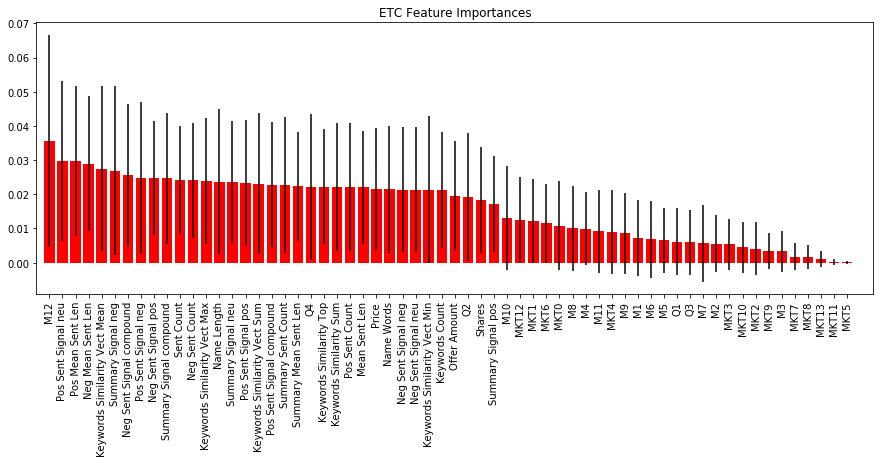

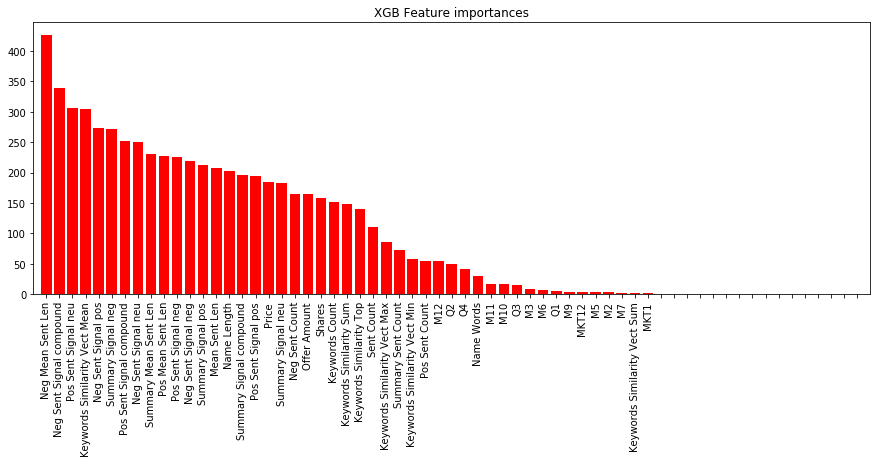

In [14]:
#feature importance
indices = ml.show_feature_importance(df1, '3M')

In [15]:
#feature selection
df1 = ml.select_features(indices.shape[0], indices, df1)

['Keywords Similarity Vect Mean', 'Neg Mean Sent Len', 'Neg Sent Signal compound', 'Neg Sent Signal pos', 'Pos Mean Sent Len', 'Pos Sent Signal neu', 'M12']


C:\Users\Void\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


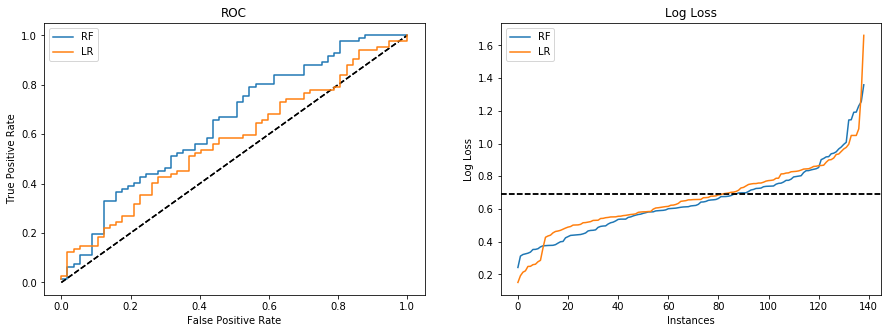

1D        1W        1M        3M
AUC      LR  0.522144  0.522144  0.522144  0.522144
         RF  0.568678  0.568678  0.568678  0.568678
f1       LR  0.733333  0.733333  0.733333  0.733333
         RF  0.748768  0.748768  0.748768  0.748768
log loss LR   0.66315   0.66315   0.66315   0.66315
         RF  0.648303  0.648303  0.648303  0.648303

In [16]:
#now run ML flow with cluster features
ml.run_ml_flow(df1)